In [1]:
import pandas as pd

df = pd.read_csv('litres_programming_data.csv')

In [2]:
# 1. Выведите первые 5 строк датасета. (0.25). Сколько в нём строк и столбцов (0.25)?
df.head(5)

,Unnamed: 0,name,author,link,rating,rating_count,review_count,price,pages,pages_count,text_of_reviews,age,year
0,0,Нейросети начало,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,4.9,433,37,690.0,102 стр. 4 иллюстрации,102,['Книга отличная. Давно хотела понять как все ...,12+,2023
1,1,Python 3 и PyQt 6. Разработка приложений,Николай Прохоренок,https://www.litres.ru/book/vladimir-dronov/pyt...,4.7,3,1,549.0,831 стр.,831,"['Большая книга, посвященная реализации графич...",0+,2023
2,3,Система взаимодействия. Коммуникации в бизнес-...,Е. Ю. Хрусталева,https://www.litres.ru/book/e-u-hrustaleva/sist...,4.3,10,3,250.0,130 стр.,130,['Полезная книга. Есть примеры оповещения поль...,12+,2019
3,4,Постановка задачи обеспечения автоматизации по...,О. В. Тиханычев,https://www.litres.ru/book/o-v-tihanychev/post...,0.0,0,0,168.0,10 стр.,10,[],0+,2021
4,7,Разработка и реализация портальных решений. Пр...,С. В. Маркова,https://www.litres.ru/book/pavel-lukyanov/razr...,0.0,0,0,350.0,166 стр.,166,[],0+,2020


In [3]:
# Сколько в нём строк и столбцов (0.25)?
df.shape
# Ответ: 965, 13

(965, 13)

In [4]:
# 2. Есть ли в датасете пропуски? (0.5)
df.isnull().sum()
# Ответ: нет

,0
Unnamed: 0,0
name,0
author,0
link,0
rating,0
rating_count,0
review_count,0
price,0
pages,0
pages_count,0


In [5]:
# 3. Проверьте типы данных.
df.dtypes

,0
Unnamed: 0,int64
name,object
author,object
link,object
rating,float64
rating_count,int64
review_count,int64
price,float64
pages,object
pages_count,int64


In [6]:
# Если это необходимо, приведите к типам int и float те столбцы, с которыми понадобится работать как с числами. (1).

# Извлечем из столбца с числом страниц чисто в формате int
def extract_number_pages(text):
    return int(text.split()[0])

df['pages'] = df['pages'].apply(extract_number_pages).astype(int)

# Извлечем возраст из возрастного рейтинга
def extract_number_age(text):
    return int(text[:-1])
df['age'] = df['age'].apply(extract_number_age)

In [7]:
# Выведите описательные статистики переменных. Ответьте на следующие вопросы:
df.describe()
# Какая медианная цена книги в вашем датасете? (1)
# Ответ: 200 (50%-й перцентиль)

,Unnamed: 0,rating,rating_count,review_count,price,pages,pages_count,age,year
count,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000
mean,594.935751,2.543420,10.338860,1.603109,348.744021,222.014508,222.014508,4.800000,2016.327461
std,347.276914,2.193727,36.058249,3.134103,279.907683,236.922129,236.922129,6.650617,5.646624
min,0.000000,0.000000,0.000000,0.000000,40.000000,2.000000,2.000000,0.000000,1985.000000
25%,297.000000,0.000000,0.000000,0.000000,129.000000,12.000000,12.000000,0.000000,2012.000000
50%,593.000000,3.600000,1.000000,0.000000,200.000000,163.000000,163.000000,0.000000,2017.000000
75%,900.000000,4.600000,6.000000,2.000000,549.000000,362.000000,362.000000,12.000000,2021.000000
max,1197.000000,5.000000,433.000000,37.000000,2200.000000,1223.000000,1223.000000,18.000000,2024.000000


In [8]:
# Какое возрастное ограничение встречается чаще всего? (1)
df['age'].mode()
# Ответ: 0

,age
0,0


In [9]:
# Какое среднее число отзывов в книге? (1)
# Ответ: ~ 1.6 (см. описательные статистики выше)

In [10]:
# Сколько книг имеют оценку ниже 4.25? (1)
df[df['rating'] < 4.25]['rating'].count()
# Ответ: 619

619

In [11]:
# В каком году было написано больше всего книг из датасета? (1)
df.groupby('year')['name'].count().sort_values(ascending=False).head(1)
# Ответ: в 2021 (91 книга)

,name
year,
2021,91


In [12]:
"""5. Если вы работаете с готовым датасетом, то попробуйте "достать" из столбца pages количество страниц.
Если у вас не получилось, то далее при определении числа страниц пользуйтесь стольцов pages_count.
Если вы парсили датасет сами, то вы получаете балл за этот пункт автоматически (1.5)"""

# Ответ: сделано ранее (см. выше: df['pages'] = df['pages'].apply(extract_number_pages).astype(int))

'5. Если вы работаете с готовым датасетом, то попробуйте "достать" из столбца pages количество страниц. \nЕсли у вас не получилось, то далее при определении числа страниц пользуйтесь стольцов pages_count. \nЕсли вы парсили датасет сами, то вы получаете балл за этот пункт автоматически (1.5)'

In [13]:
# 6. Создайте новое поле is_popular. Значение равно 1, если рейтинг книги не менее 4.6 и при этом у нее не менее 5 отзывов, и 0 в остальных случаях. (1)
df['is_popular'] = df.apply(lambda row: 1 if (row['rating'] >= 4.6) & (row['review_count'] >= 5) else 0, axis=1)

In [14]:
# 7. Как отличается среднее число страниц среди популярных и непопулярных книг? (2)
print(f'Среднее число страниц в популярных книгах: {df[df["is_popular"] == 1]["pages"].mean():.1f}')
print(f'Среднее число страниц в непопулярных книгах: {df[df["is_popular"] == 0]["pages"].mean():.1f}')
print(f'Среднее число страниц в популярных книгах в {(df[df["is_popular"] == 1]["pages"].mean() / df[df["is_popular"] == 0]["pages"].mean()):.1f} раз больше, чем в непопулярных')

Среднее число страниц в популярных книгах: 380.9
Среднее число страниц в непопулярных книгах: 216.6
Среднее число страниц в популярных книгах в 1.8 раз больше, чем в непопулярных


In [19]:
# 8. Выведите топ-10 книг по числу отзывов. (2).
sorted_df = df.sort_values(by='review_count', ascending=False)
sorted_df['name'].head(10)

,name
0,Нейросети начало
775,Теоретический минимум по Computer Science. Все...
98,#Сам себе программист. Как научиться программи...
692,Нейросети. Обработка естественного языка
494,"Изучаем Python: программирование игр, визуализ..."
528,"Swift. Основы разработки приложений под iOS, i..."
89,Облачные технологии. Практическое руководство ...
458,Путь лидера
481,Программирование на C++ в примерах и задачах
947,1С:Программирование для начинающих. Детям и ро...


In [28]:
# 9. Найдите среднюю длину отзыва (в символах). (2)
df['review_length'] = df.apply(lambda row: len(row['name'].replace(' ', '')), axis=1) # удаляем пробелы
df['review_length'].mean()
# Ответ 57.88

57.88290155440414

In [33]:
# 10. Постройте таблицу корреляций числовых переменных. (1) Прокомментируйте результаты. (1)
df.select_dtypes(include=['number']).corr()
# Комментарий:
# - отмечается средняя положительная корреляция между количеством оценок и количеством отзывов (0.68). Закономерность очевидна (больше оценок - больше отзывов)
# - есть средняя положительная корреляция между количеством страниц и ценой (0.64). В целом, очевидно, что чем больше страниц, тем дороже себестоимость книги и выше цена

,Unnamed: 0,rating,rating_count,review_count,price,pages,pages_count,age,year,is_popular,review_length
Unnamed: 0,1.000000,0.000669,-0.011110,-0.031390,0.009405,-0.032620,-0.032620,-0.032635,0.022358,-0.062759,-0.015570
rating,0.000669,1.000000,0.257016,0.402186,0.410324,0.509376,0.509376,0.433156,0.264318,0.197465,-0.384147
rating_count,-0.011110,0.257016,1.000000,0.683794,0.208341,0.135824,0.135824,0.221253,0.160573,0.571547,-0.193191
review_count,-0.031390,0.402186,0.683794,1.000000,0.309463,0.348800,0.348800,0.352973,0.165968,0.435468,-0.218339
price,0.009405,0.410324,0.208341,0.309463,1.000000,0.639805,0.639805,0.484190,0.428793,0.143033,-0.278459
pages,-0.032620,0.509376,0.135824,0.348800,0.639805,1.000000,1.000000,0.424448,0.201769,0.124267,-0.349284
pages_count,-0.032620,0.509376,0.135824,0.348800,0.639805,1.000000,1.000000,0.424448,0.201769,0.124267,-0.349284
age,-0.032635,0.433156,0.221253,0.352973,0.484190,0.424448,0.424448,1.000000,0.459847,0.143136,-0.181966
year,0.022358,0.264318,0.160573,0.165968,0.428793,0.201769,0.201769,0.459847,1.000000,0.157431,-0.107571
is_popular,-0.062759,0.197465,0.571547,0.435468,0.143033,0.124267,0.124267,0.143136,0.157431,1.000000,-0.107025


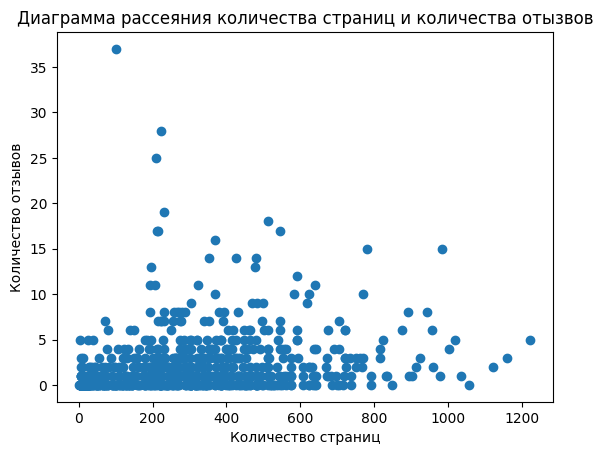

In [34]:
# Постройте диаграмму рассеяния (scatterplot) количества страниц и количества отзывов. Не забудьте подписать график и оси. (1) Прокомментируйте полученные результаты. (1)
import matplotlib.pyplot as plt

plt.scatter(df['pages_count'], df['review_count'])
plt.title('Диаграмма рассеяния количества страниц и количества отызвов')
plt.xlabel('Количество страниц')
plt.ylabel('Количество отзывов')
plt.show()

# Вывод: на мой взгляд какой-то статистически-значимой связи между количеством отзывов и количеством страниц нет.
# Большинство книг имеет менее 5 отзывов и какой-то четкой тенденции не прослеживается

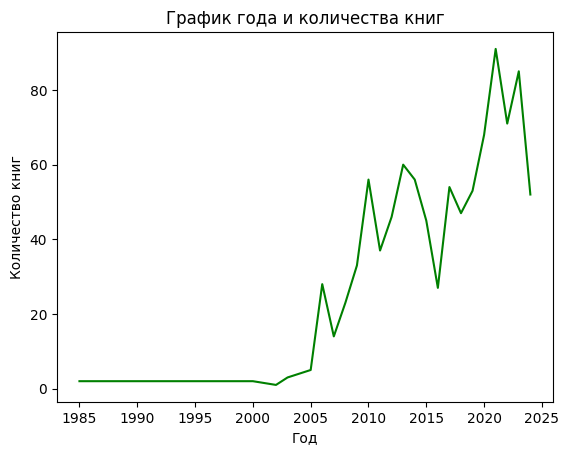

In [36]:
# 12. Постройте линейный график: по оси Х год, по оси Y количество книг. (1) Прокомментируйте. (1)

count_by_year = df.groupby('year')['name'].count().reset_index()

plt.plot(count_by_year['year'], count_by_year['name'], color = 'g')
plt.title('График года и количества книг')
plt.xlabel('Год')
plt.ylabel('Количество книг')
plt.show()

# Вывод: количество книг имеет тенденцию к возрастанию с каждым годом.
# Причиной может быть рост популярности электронных книг и планшетов,
# в связи с чем издательства стараются публиковаться не только на бумаге
# но и в онлайне

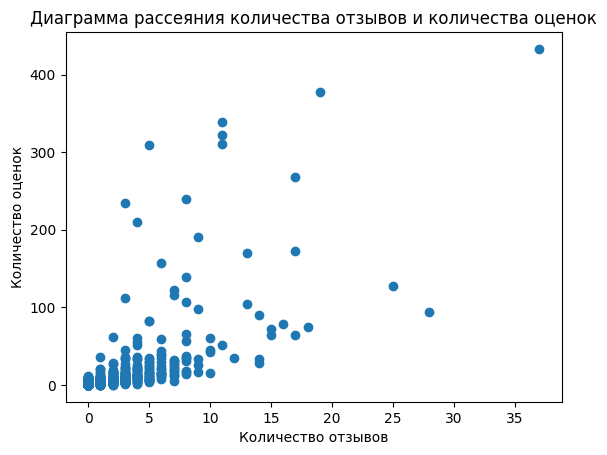

In [37]:
# 13. Постройте еще любые два графика по вашему усмотрению. (2) Прокомментируйте полученные результаты. (1.5)

plt.scatter(df['review_count'], df['rating_count'])
plt.title('Диаграмма рассеяния количества отзывов и количества оценок')
plt.xlabel('Количество отзывов')
plt.ylabel('Количество оценок')
plt.show()

# Наличие корреляции между количеством отзывов и количеством оценок подтверждается графически

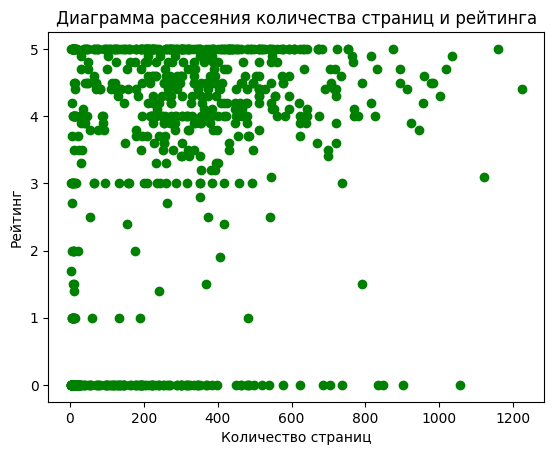

In [39]:
plt.scatter(df['pages'], df['rating'], color = 'g')
plt.title('Диаграмма рассеяния количества страниц и рейтинга')
plt.xlabel('Количество страниц')
plt.ylabel('Рейтинг')
plt.show()

# Вывод: корреляции между количеством страниц и рейтингом нет, однако в целом можно сказать,
# что оценок у книг с большим количеством страниц меньше, чем у книг с маленьким количеством.

In [ ]:
# 14. Постройте таблицу с авторами книг с именем автора, количество книг в датасете, средней оценкой книг, средним количеством отзывов. (2).

